# Figures for the paper

Plots for the new papere

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from copy import copy
import scienceplots

: 

In [6]:
#autoreloaa extensions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
plt.rcParams.update({
    "font.size" : 20})
plt.style.use('science')

In [4]:
#import data
root_path = os.getenv("DATA_DIR")
evidence = pd.read_pickle(os.path.join(root_path, "two_populations", "evidence_aligned_train.pkl"))

In [5]:
#filter out test set
test_set_experiments = ["SRMATLAS", "MissingGene", "Proteotypic"]
evidence = evidence[~evidence.Experiment.isin(test_set_experiments)]

In [6]:
print(f"Before filtering: {evidence.shape[0]}")
#Filter out Reverse, Intensity > 0 and Charge 1
mask = (evidence["Reverse"] != "+") & (evidence["Charge"] > 1) & (evidence["Intensity"] > 0 & (~evidence["Aligned 1/K0"].isna()) )
evidence = evidence[mask]
print(f"After filtering: {evidence.shape[0]}")

Before filtering: 2812863
After filtering: 2812863


# Supplementary Figure 2

In [7]:
exp_to_organism = {
    "pasef_fdr100" : "Homo Sapiens",
    "Yeast_lysc_fdr100" : "Yeast",
    "Yeast_trp_fdr100" : "Yeast",
    "Yeast_lysn_fdr100" : "Yeast",
    "Drosophila_LysC_fdr100" : "Drosophila",
    "Drosophila_lsyn_fdr100" : "Drosophila",
    "Drosophila_trypsin_fdr100" : "Drosophila",
    "CElegans_trp_fdr100" : "C Elegans",
    "HeLa_Trp_fdr100" : "Homo Sapiens",
    "HeLa_LysC_fdr100" : "Homo Sapiens",
    "HeLa_LysN_fdr100" : "Homo Sapiens",
    "Ecoli_trypsin_fdr100" : "Ecoli",
    "Ecoli_LysC_fdr100" : "Ecoli",
    "Ecoli_lysn_fdr100" : "Ecoli"
}

evidence["Organism"] = evidence["Experiment"].map(exp_to_organism)

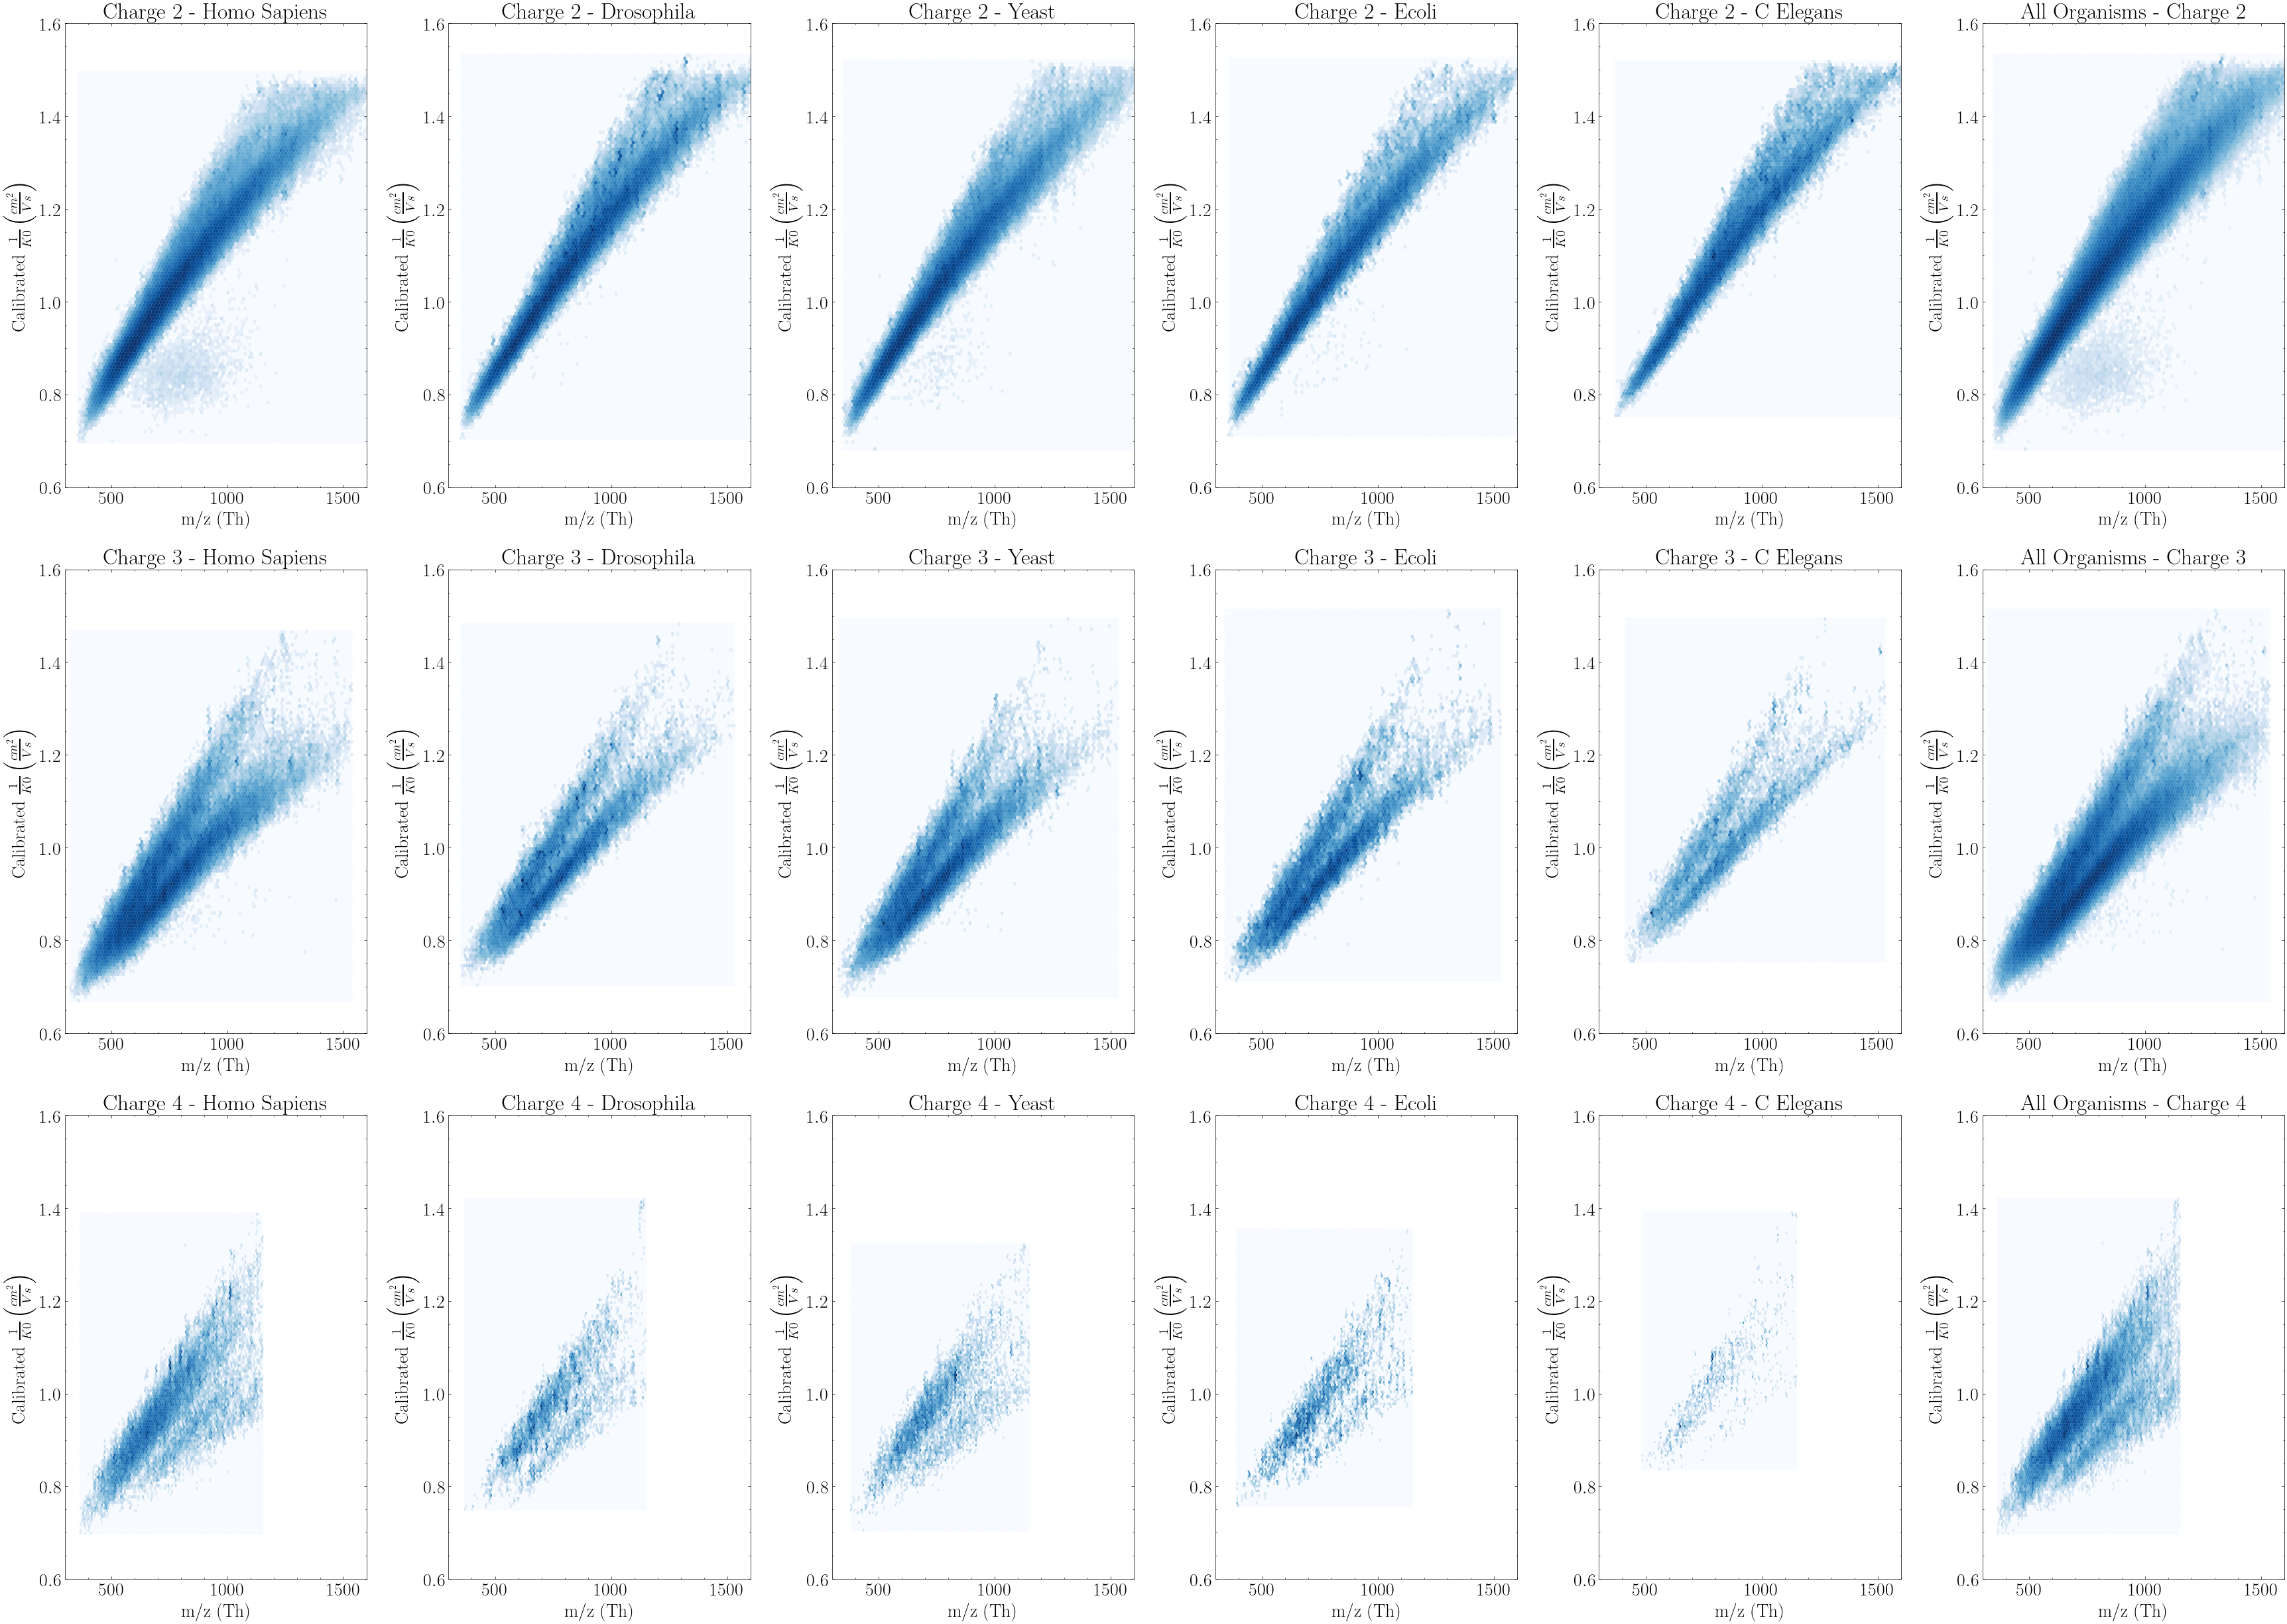

In [11]:
#plot 1/K0 vs m/z for each organism(rows) and charge state (columns)

fig, ax = plt.subplots(3, 6, figsize=(35, 25))

for i, charge in enumerate([2,3,4]):
    #  plot for each organism
    for j, organism in enumerate(evidence["Organism"].unique()):
        mask = evidence["Charge"] == charge
        mask &= evidence["Organism"] == organism
        evidence_charge = evidence[mask]
        ax[i,j].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
        ax[i,j].set_xlabel("m/z (Th)")
        ax[i,j].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
        ax[i,j].set_title(f"Charge {charge} - {organism}")
        ax[i,j].set_xlim([300, 1600])
        ax[i,j].set_ylim([0.6, 1.6])

    # all organisms
    mask = evidence["Charge"] == charge
    evidence_charge = evidence[mask]
    ax[i,5].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
    ax[i,5].set_xlabel("m/z (Th)")
    ax[i,5].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
    ax[i,5].set_title(f"All Organisms - Charge {charge}")
    ax[i,5].set_xlim([300, 1600])
    ax[i,5].set_ylim([0.6, 1.6])
        
plt.tight_layout()

# Supplementary Figure 3

Describe the bunny ears and the enzyme dependence

In [12]:
exp_to_enzym = {
    "pasef_fdr100" : "Trypsin",
    "Yeast_lysc_fdr100" : "LysC",
    "Yeast_trp_fdr100" : "Trypsin",
    "Yeast_lysn_fdr100" : "LysN",
    "Drosophila_LysC_fdr100" : "LysC",
    "Drosophila_lsyn_fdr100" : "LysN",
    "Drosophila_trypsin_fdr100" : "Trypsin",
    "CElegans_trp_fdr100" : "Trypsin",
    "HeLa_Trp_fdr100" : "Trypsin",
    "HeLa_LysC_fdr100" : "LysC",
    "HeLa_LysN_fdr100" : "LysN",
    "Ecoli_trypsin_fdr100" : "Trypsin",
    "Ecoli_LysC_fdr100" : "LysC",
    "Ecoli_lysn_fdr100" : "LysN"
}

evidence["Enzyme"] = evidence["Experiment"].map(exp_to_enzym)

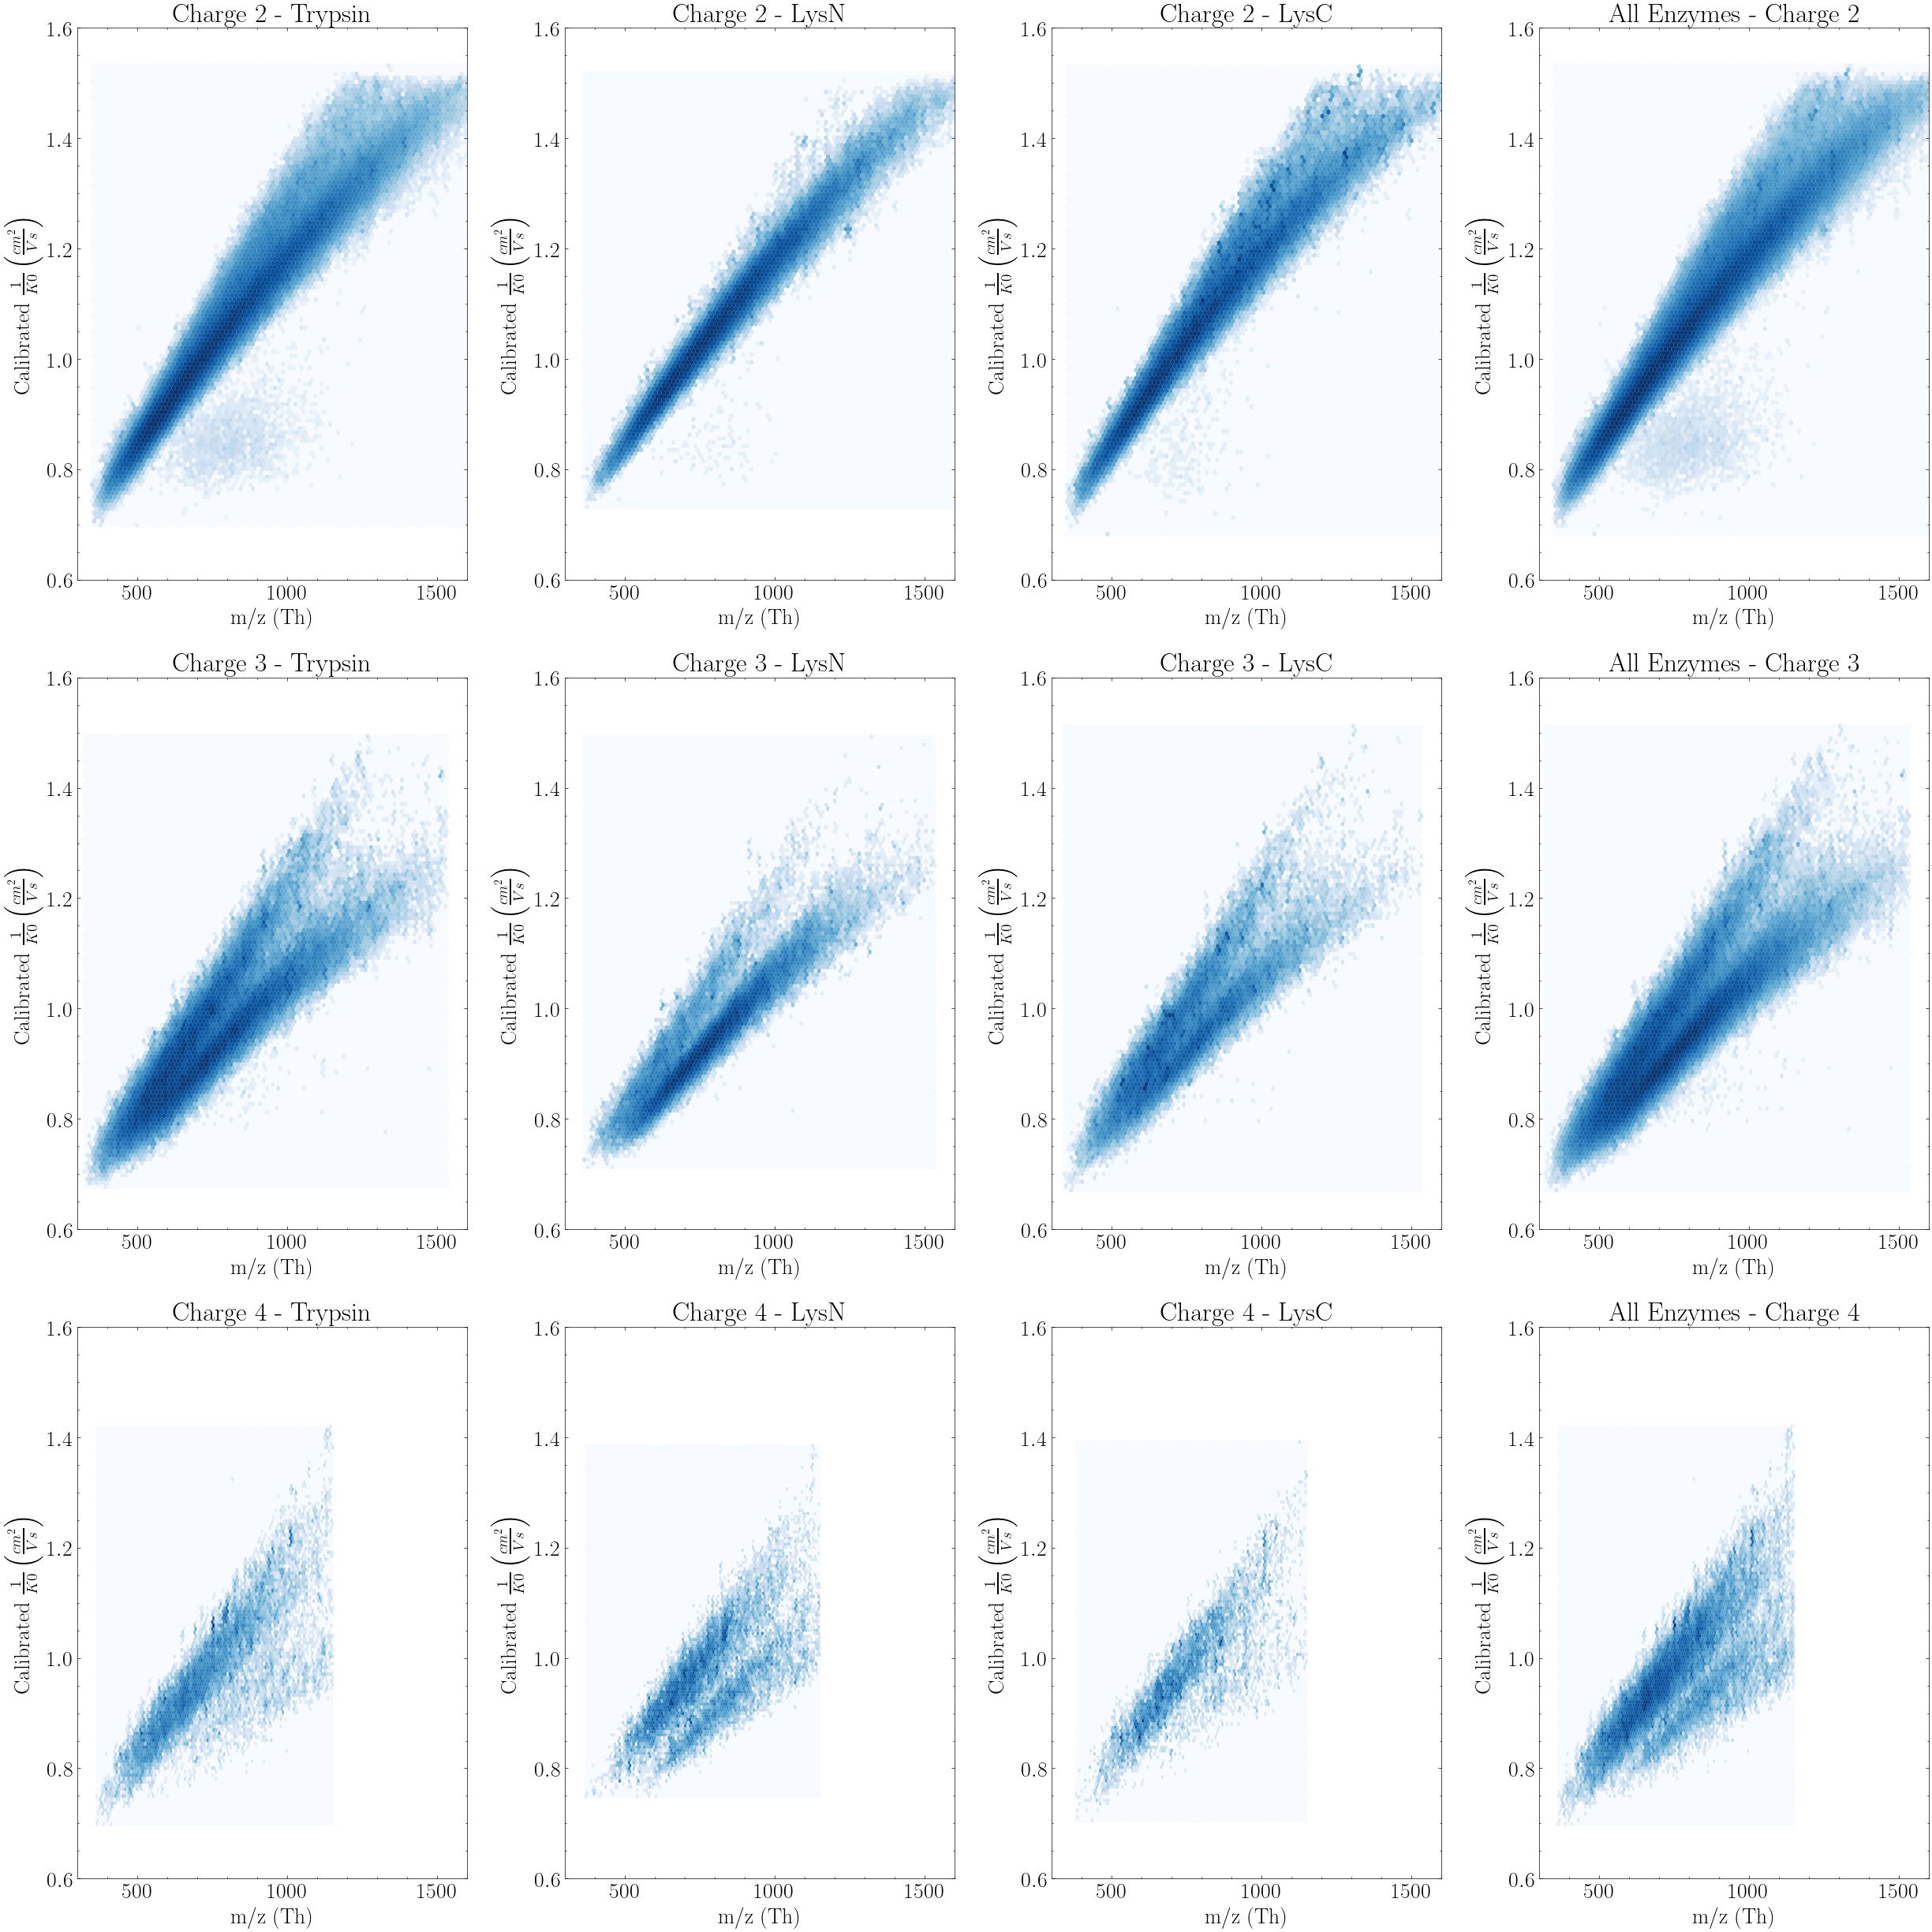

In [14]:
#plot Calibrated 1/K0 vs m/z for each charge
#to make it better see https://matplotlib.org/stable/gallery/image#jjjjelds/pcolormesh_levels.html
fig, ax = plt.subplots(3, 4, figsize=(25, 25))

for i, charge in enumerate([2, 3, 4]):
    #  plot for each enzyme
    for j, enzyme in enumerate(evidence["Enzyme"].unique()):
        mask = evidence["Charge"] == charge
        mask &= evidence["Enzyme"] == enzyme
        evidence_charge = evidence[mask]
        ax[i,j].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
        ax[i,j].set_xlabel("m/z (Th)")
        ax[i,j].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
        ax[i,j].set_title(f"Charge {charge} - {enzyme}")
        ax[i,j].set_xlim([300, 1600])
        ax[i,j].set_ylim([0.6, 1.6])

    # all enzymes
    mask = evidence["Charge"] == charge
    evidence_charge = evidence[mask]
    ax[i,3].hexbin(evidence_charge["m/z"].values, evidence_charge["Aligned 1/K0"].values, gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log")
    ax[i,3].set_xlabel("m/z (Th)")
    ax[i,3].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")
    ax[i,3].set_title(f"All Enzymes - Charge {charge}")
    ax[i,3].set_xlim([300, 1600])
    ax[i,3].set_ylim([0.6, 1.6])
        
plt.tight_layout()
plt.show()

# Figure 1

## Supplementary Figure 1

In [7]:
exp_to_enzym = {
    "pasef_fdr100" : "Trypsin",
    "Yeast_lysc_fdr100" : "LysC",
    "Yeast_trp_fdr100" : "Trypsin",
    "Yeast_lysn_fdr100" : "LysN",
    "Drosophila_LysC_fdr100" : "LysC",
    "Drosophila_lsyn_fdr100" : "LysN",
    "Drosophila_trypsin_fdr100" : "Trypsin",
    "CElegans_trp_fdr100" : "Trypsin",
    "HeLa_Trp_fdr100" : "Trypsin",
    "HeLa_LysC_fdr100" : "LysC",
    "HeLa_LysN_fdr100" : "LysN",
    "Ecoli_trypsin_fdr100" : "Trypsin",
    "Ecoli_LysC_fdr100" : "LysC",
    "Ecoli_lysn_fdr100" : "LysN"
}

evidence["Enzyme"] = evidence["Experiment"].map(exp_to_enzym)

In [8]:
# Define the list of enzymes
enzymes = ["Trypsin", "LysC", "LysN"]

gmm_models = {}
pdfs = {}
initial_means = {
    2:{
    "Trypsin": np.array([[2.0, 3.0], [1.0, 0.0]]),
    "LysC" : np.array([[1.0, 3.0], [0.5, 0.0]]), 
    "LysN": np.array([[-1.0, 0.0], [-1.0, 0.0]])
    },
    3: {
    "Trypsin": np.array([[-0.5, 0], [0, -1.0]]),
    "LysC": np.array([[-0.5, 0], [0.5, 0.5]]),
    "LysN": np.array([[-1.0, 0.0], [0.5, 0.5]])
    },
    4: {
    "Trypsin": np.array([[-1.0, -1.0], [1.5, -1.0]]),
    "LysC": np.array([[0.0, .0], [2.0, -1.0]]),
    "LysN": np.array([[0.0,0.0], [1.0, -1.0]])
    }
}
evidence["cluster"] = -1

/fs/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/fs/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/fs/home/rlopez/miniconda3/envs/ccs/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is tryi

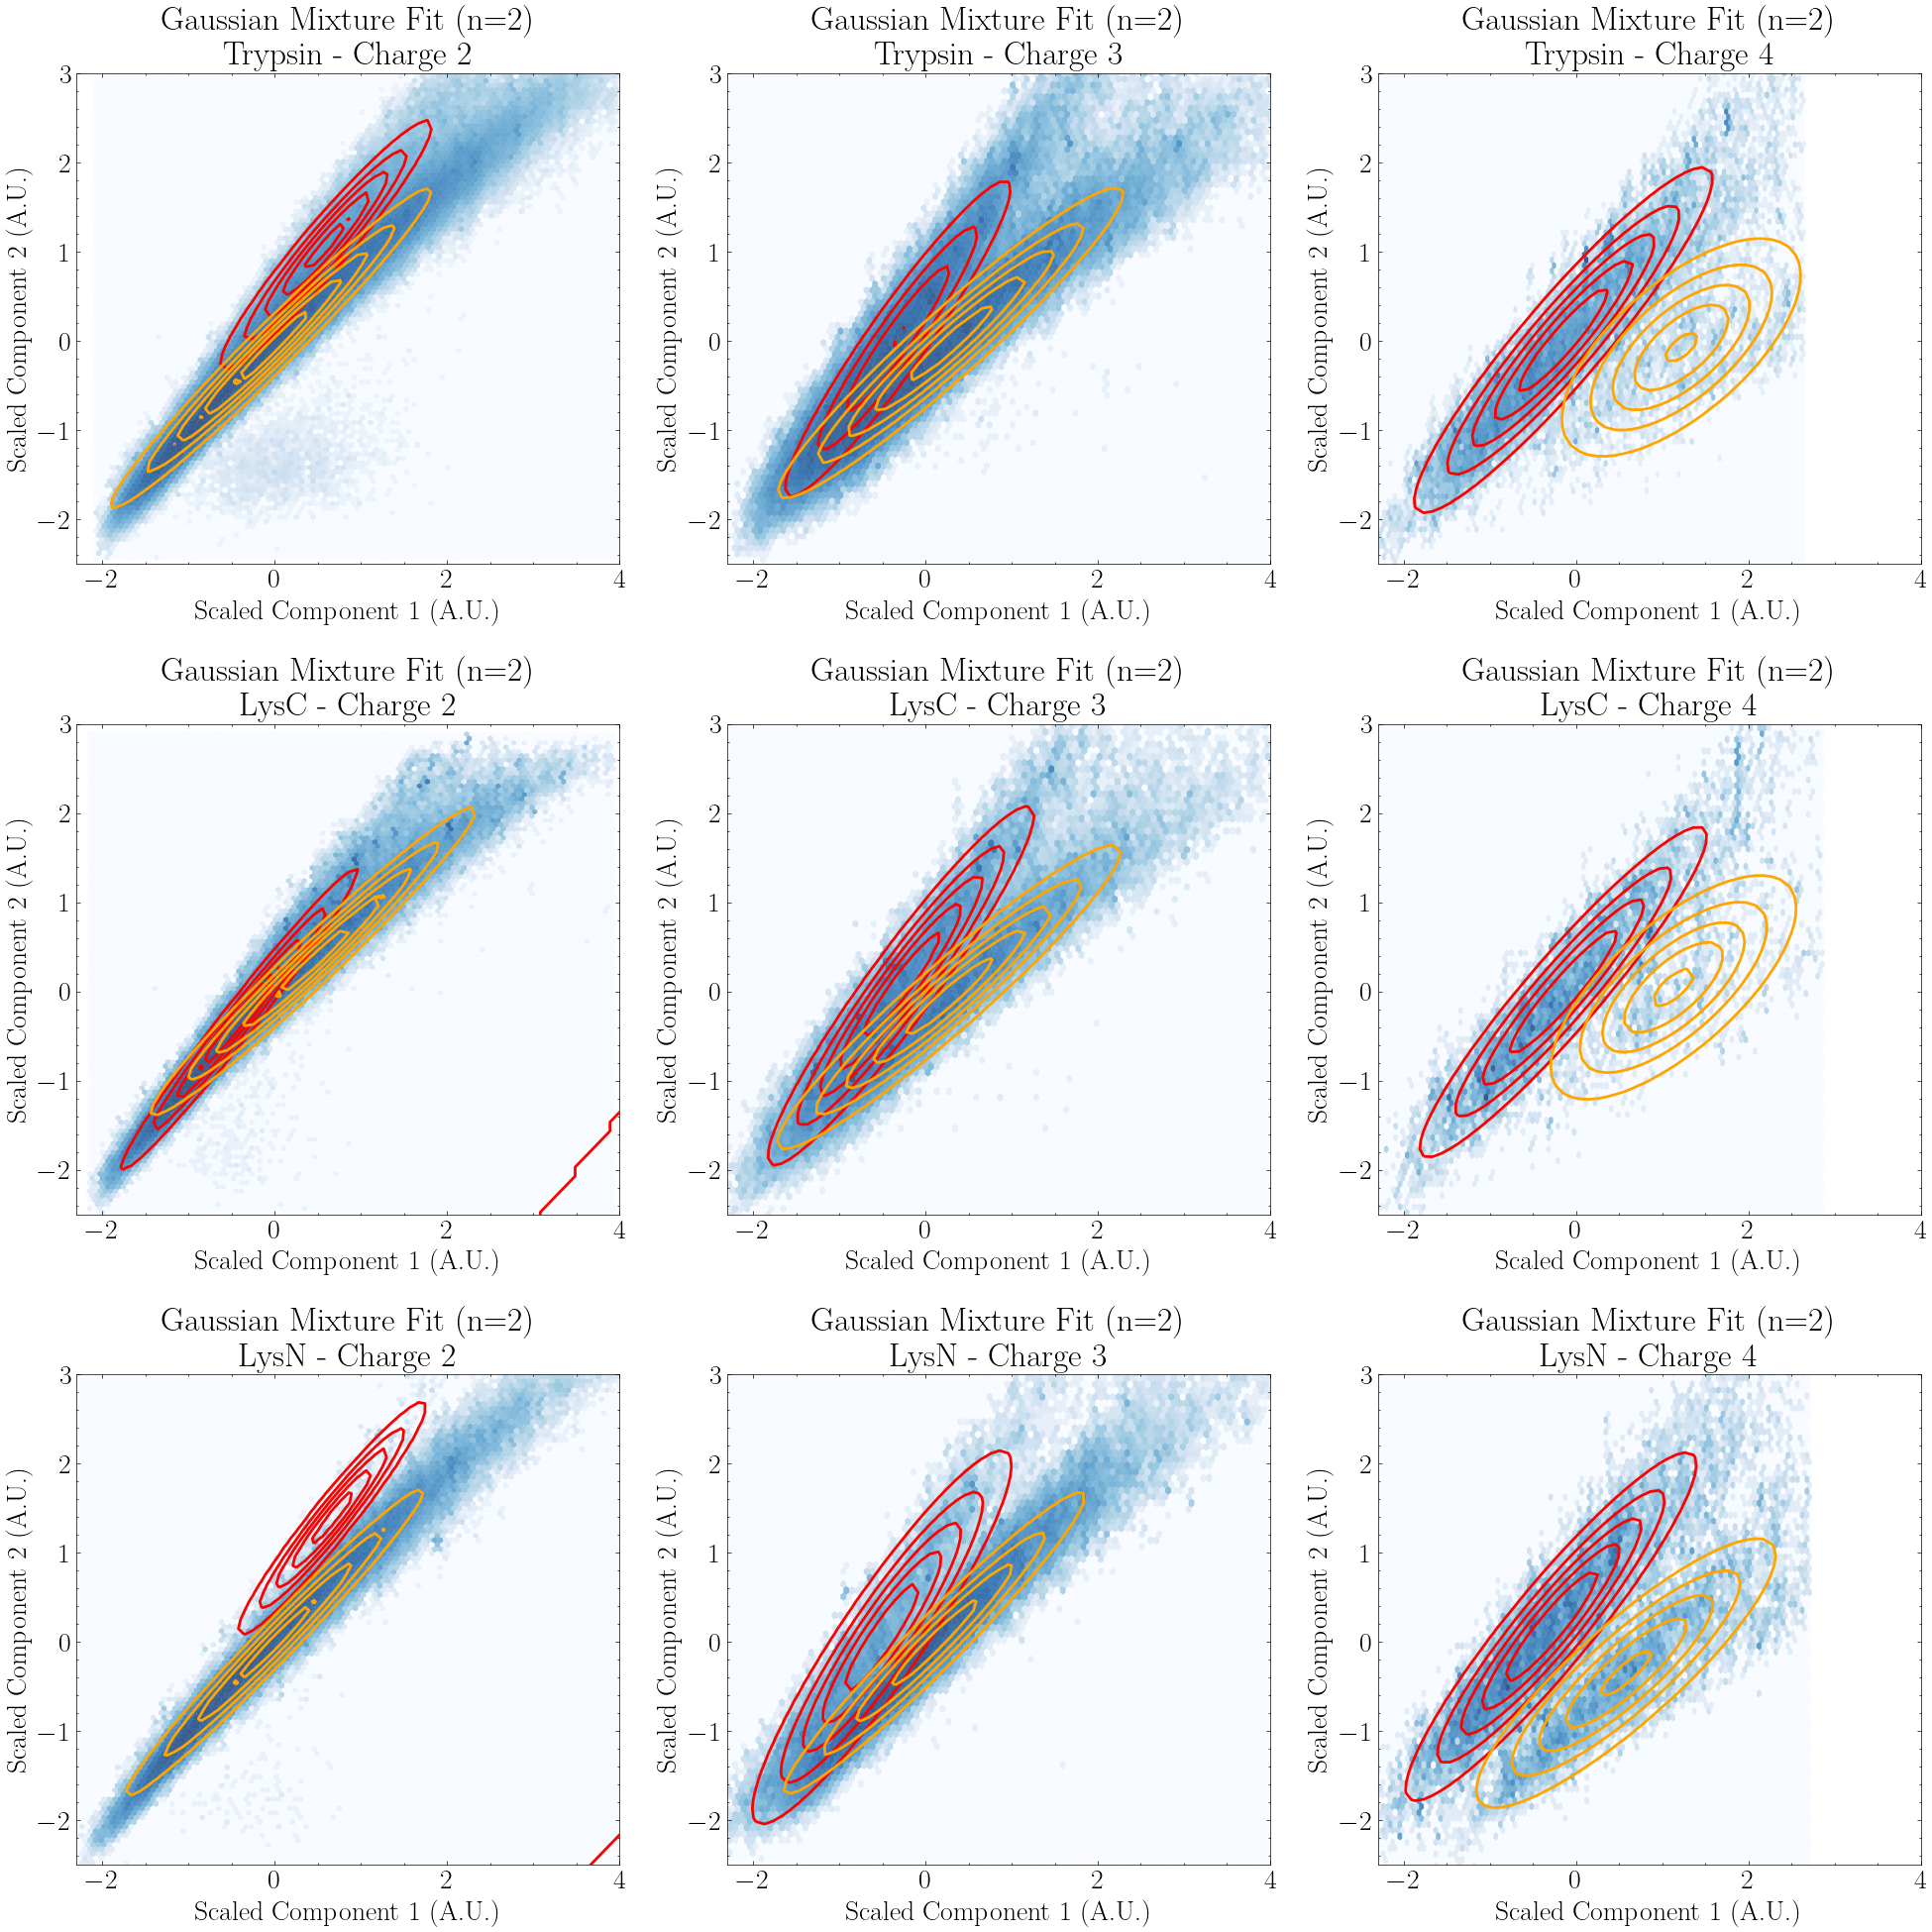

In [9]:
 
# Create a figure with 3 rows (one for each enzyme) and 3 columns (one for each charge)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))

for j, charge in enumerate([2, 3, 4]):
    gmm_models[charge] = {} # Initialize dictionary for charge
    for i, enzyme in enumerate(enzymes):
        # Filter data for the current enzyme and charge
        mask = (evidence["Charge"] == charge) & (evidence["Enzyme"] == enzyme)
        evidence_charge = evidence.loc[mask]

        # Scale data to have mean 0 and variance 1 for gaussian mixture
        X = evidence_charge[["m/z", "Aligned 1/K0"]]
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0, means_init=initial_means[charge][enzyme],)
        gmm.fit(X_scaled)
        #predict the cluster
        labels = gmm.predict(X_scaled)
        evidence_charge.loc[:,"cluster"] = labels
        evidence.loc[evidence_charge.index, "cluster"] = labels
        gmm_models[charge][enzyme] = gmm

        axes[i,j].hexbin(X_scaled[:, 0], X_scaled[:, 1], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log", alpha=0.8)

        x = np.linspace(-5, 5, 100)
        y = np.linspace(-5, 5, 100)
        X, Y = np.meshgrid(x, y)
        pos = np.empty(X.shape + (2,))
        pos[:, :, 0] = X
        pos[:, :, 1] = Y

        color_list = ["red", "orange"]
        for k in range(2):
            rv = multivariate_normal(gmm.means_[k], gmm.covariances_[k])
            contour = axes[i,j].contour(X, Y, rv.pdf(pos), levels=5, colors=color_list[k], linewidths=2)
            # Create a proxy artist for the contour plot
        axes[i,j].set_title(f"Gaussian Mixture Fit (n=2) \n {enzyme} - Charge {charge}")
        axes[i,j].set_xlim(-2.3,4)
        axes[i,j].set_ylim(-2.5,3)
        axes[i,j].set_xlabel("Scaled Component 1 (A.U.)")
        axes[i,j].set_ylabel("Scaled Component 2 (A.U.)")

plt.tight_layout()

## Both conformations

the cluster column has information about in which population they're predicted to be

In [10]:
#calculate numerically the volume of a gaussian
def volume_gaussian_2d(gmm, cluster):
    #calculate the volume of the gaussian
    cov = gmm.covariances_[cluster]
    det = np.linalg.det(cov)
    weight = gmm.weights_[cluster]
    volume = 2*np.pi*np.sqrt(det)*weight
    return volume

#test the volume of the gaussian
#should be 2*pi when covariance is identity
gmm_test = copy(gmm)
gmm_test.covariances_ = [np.array([[1,0], [0,1]])]
gmm_test.weights_ = [1]
vol_test = volume_gaussian_2d(gmm_test, 0)
assert np.isclose(vol_test, 2*np.pi, atol=1e-3)

In [11]:
#create a table with the charges in the columns and the enzymes in the rows
# and the percentage of volume of the bottom gaussian in each cluster
volumes = pd.DataFrame()

for charge in [2, 3, 4]:
    for i, enzyme in enumerate(enzymes):
        gmm = gmm_models[charge][enzyme]
        vol_0 = volume_gaussian_2d(gmm, 0)
        vol_1 = volume_gaussian_2d(gmm, 1)
        volumes.loc[enzyme, charge] = vol_1/ (vol_0 + vol_1)

volumes

2         3         4
Trypsin  0.946158  0.545220  0.120321
LysC     0.575131  0.520840  0.134846
LysN     0.997046  0.765916  0.363362

In [12]:
#Is the volume a good proxy for the number of points?

#create a table with the charges in the columns and the enzymes in the rows
# and the normalized value counts of the clusters
counts = pd.DataFrame()
for charge in [2, 3, 4]:
    for i, enzyme in enumerate(enzymes):
        mask = (evidence["Charge"] == charge) & (evidence["Enzyme"] == enzyme)
        evidence_charge = evidence[mask]
        counts.loc[enzyme, charge] = evidence_charge["cluster"].value_counts(normalize=True).loc[1]
counts

2         3         4
Trypsin  0.943858  0.504493  0.099330
LysC     0.375450  0.496104  0.104943
LysN     0.995606  0.873514  0.325307

In [13]:
#sort evidence by Modified sequence, charge and K0 and get the groups of size 2 whose elements are in more than one cluster
peptides_in_both = evidence.sort_values(["Modified sequence", "Charge", "Aligned 1/K0"], ascending=False)
#peptides_in_both = evidence.groupby(["Modified sequence", "Charge"]).filter(lambda x: x.shape[0] > 1)
peptides_in_both = peptides_in_both.groupby(["Modified sequence", "Charge"]).filter(lambda x: x["cluster"].nunique() > 1)
#get the top measure
top = peptides_in_both.groupby(["Modified sequence", "Charge"]).first()
#get the bottom measure
bottom = peptides_in_both.groupby(["Modified sequence", "Charge"]).last()
#concatenate the top and bottom measures
peptides_both = pd.concat([top, bottom], axis=0)
#sort it by Modified sequence and charge 
peptides_both = peptides_both.sort_values(["Modified sequence", "Charge"]).reset_index()

In [14]:
top.shape, bottom.shape, 

((51504, 81), (51504, 81))

Enzyme Trypsin - Charge 2 - 48782/291078
Enzyme Trypsin - Charge 3 - 13835/89198
Enzyme Trypsin - Charge 4 - 721/11685
Enzyme LysC - Charge 2 - 29847/65374
Enzyme LysC - Charge 3 - 4294/25725
Enzyme LysC - Charge 4 - 312/4699
Enzyme LysN - Charge 2 - 427/80040
Enzyme LysN - Charge 3 - 3445/37422
Enzyme LysN - Charge 4 - 1345/10230


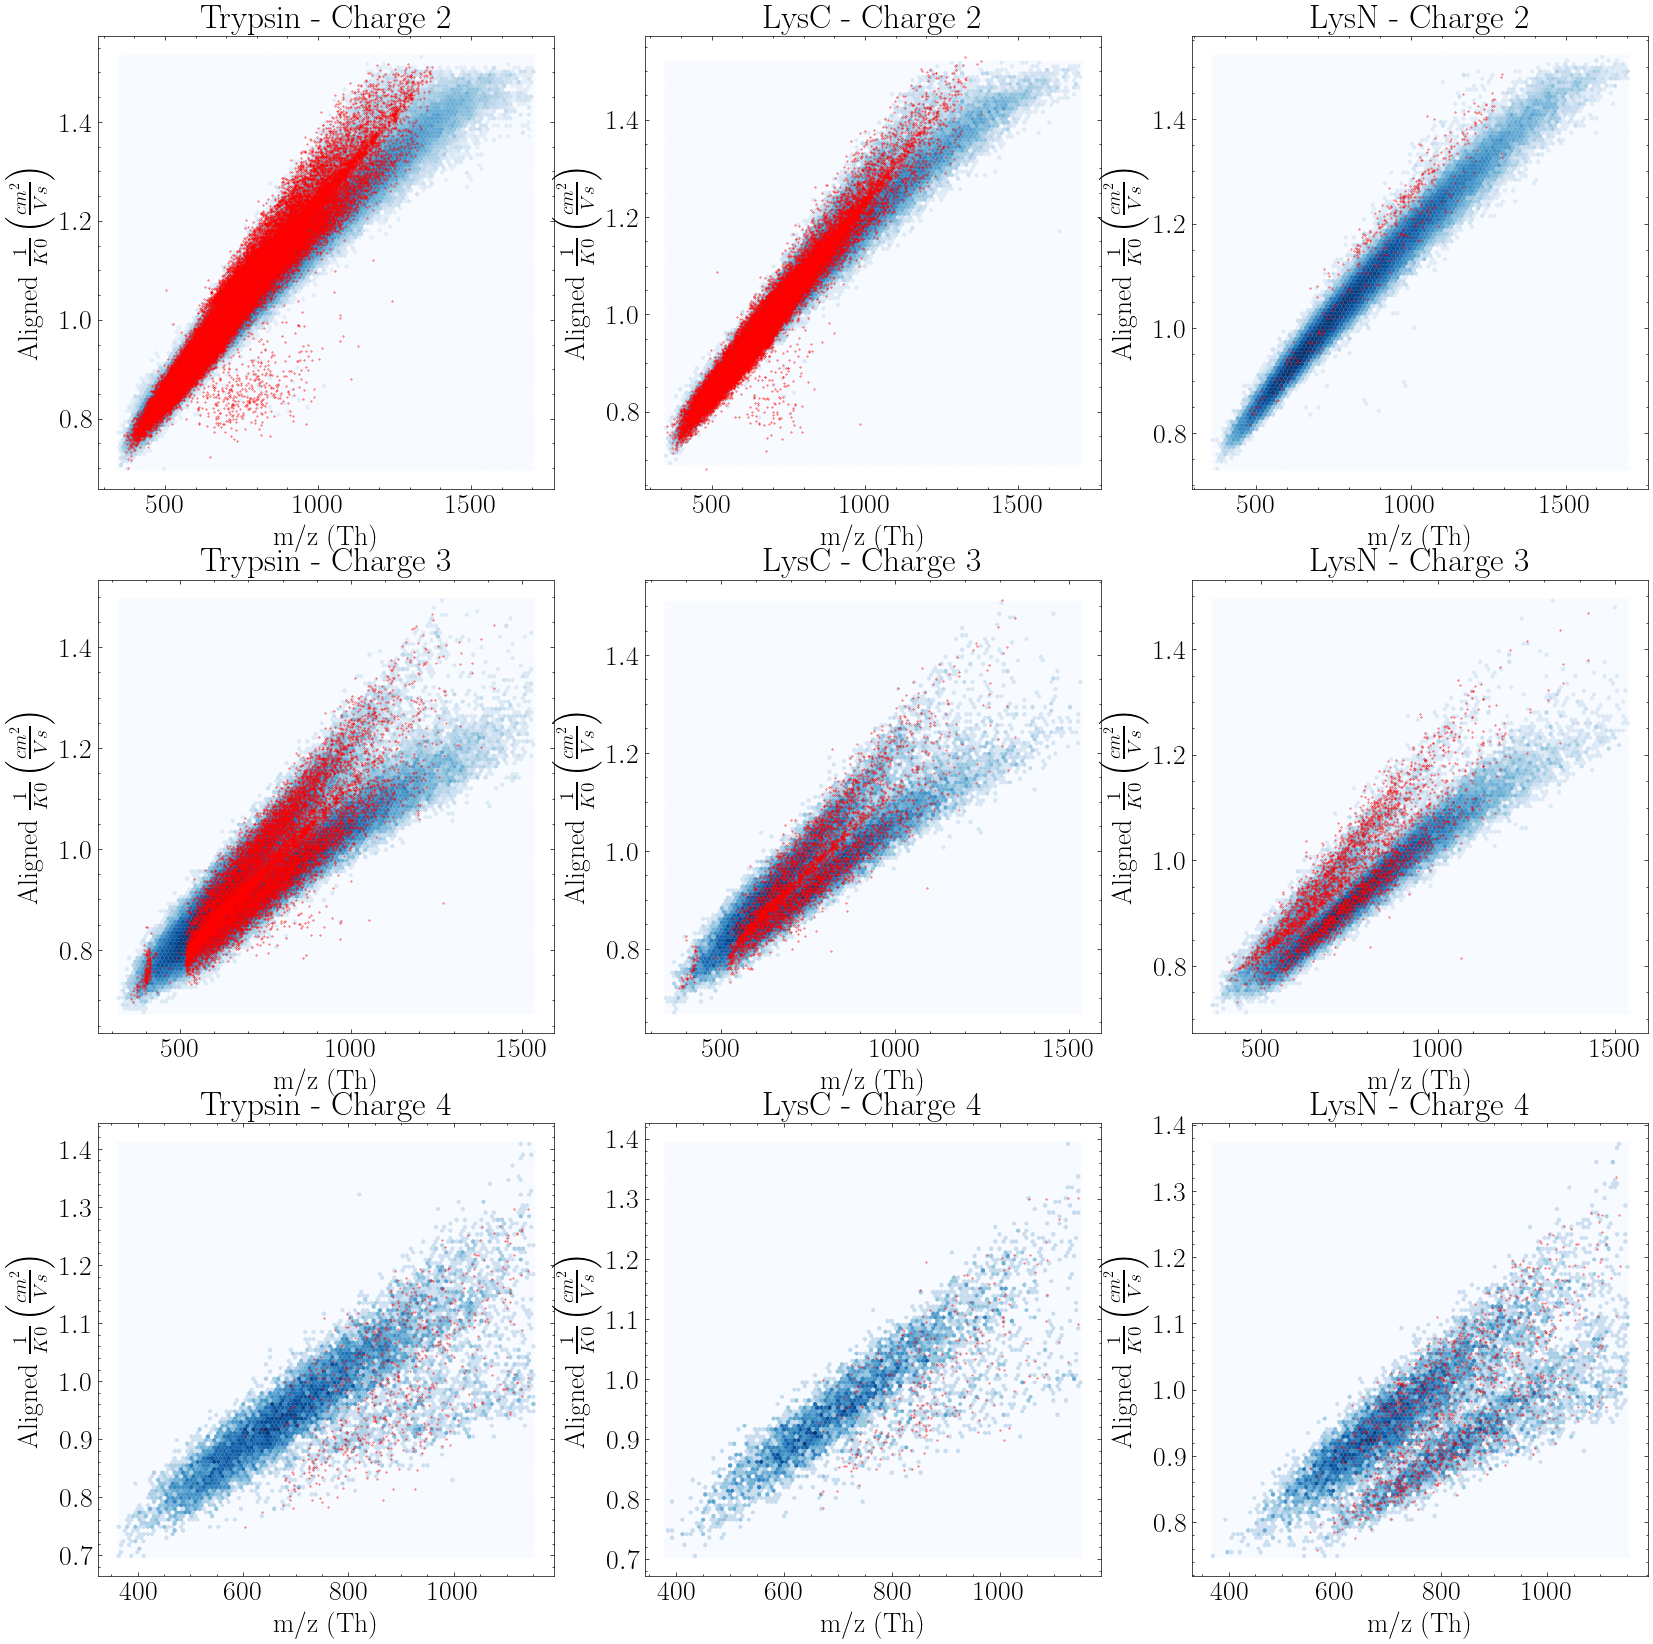

In [15]:
#plot trypitci, ch3 peptides and in red those in both clusters
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
in_both = pd.DataFrame()
precursors = evidence.groupby(["Modified sequence", "Charge"]).first().reset_index()

for i, enzyme in enumerate(enzymes):
    mask = precursors["Enzyme"] == enzyme
    precursors_enzyme = precursors[mask]
    mask = peptides_both["Enzyme"] == enzyme
    peptides_in_both_enzyme = peptides_both[mask]
    for j, charge in enumerate([2, 3, 4]):
        mask = precursors_enzyme["Charge"] == charge
        precursors_charge = precursors_enzyme[mask]
        mask = peptides_in_both_enzyme["Charge"] == charge
        peptides_in_both_charge = peptides_in_both_enzyme[mask]
        in_both.loc[enzyme, charge] = f"{peptides_in_both_charge.shape[0]}/{precursors_charge.shape[0]}"
        print(f"Enzyme {enzyme} - Charge {charge} - {in_both.loc[enzyme, charge]}")
        ax[j,i].hexbin(precursors_charge["m/z"], precursors_charge["Aligned 1/K0"], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log",)
        ax[j,i].scatter(peptides_in_both_charge["m/z"], peptides_in_both_charge["Aligned 1/K0"], c="red", s=0.1, alpha=1.0)
        ax[j,i].set_title(f"{enzyme} - Charge {charge}")
        ax[j,i].set_xlabel("m/z (Th)")
        ax[j,i].set_ylabel(r"Aligned $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$ ")

## Complete Figure

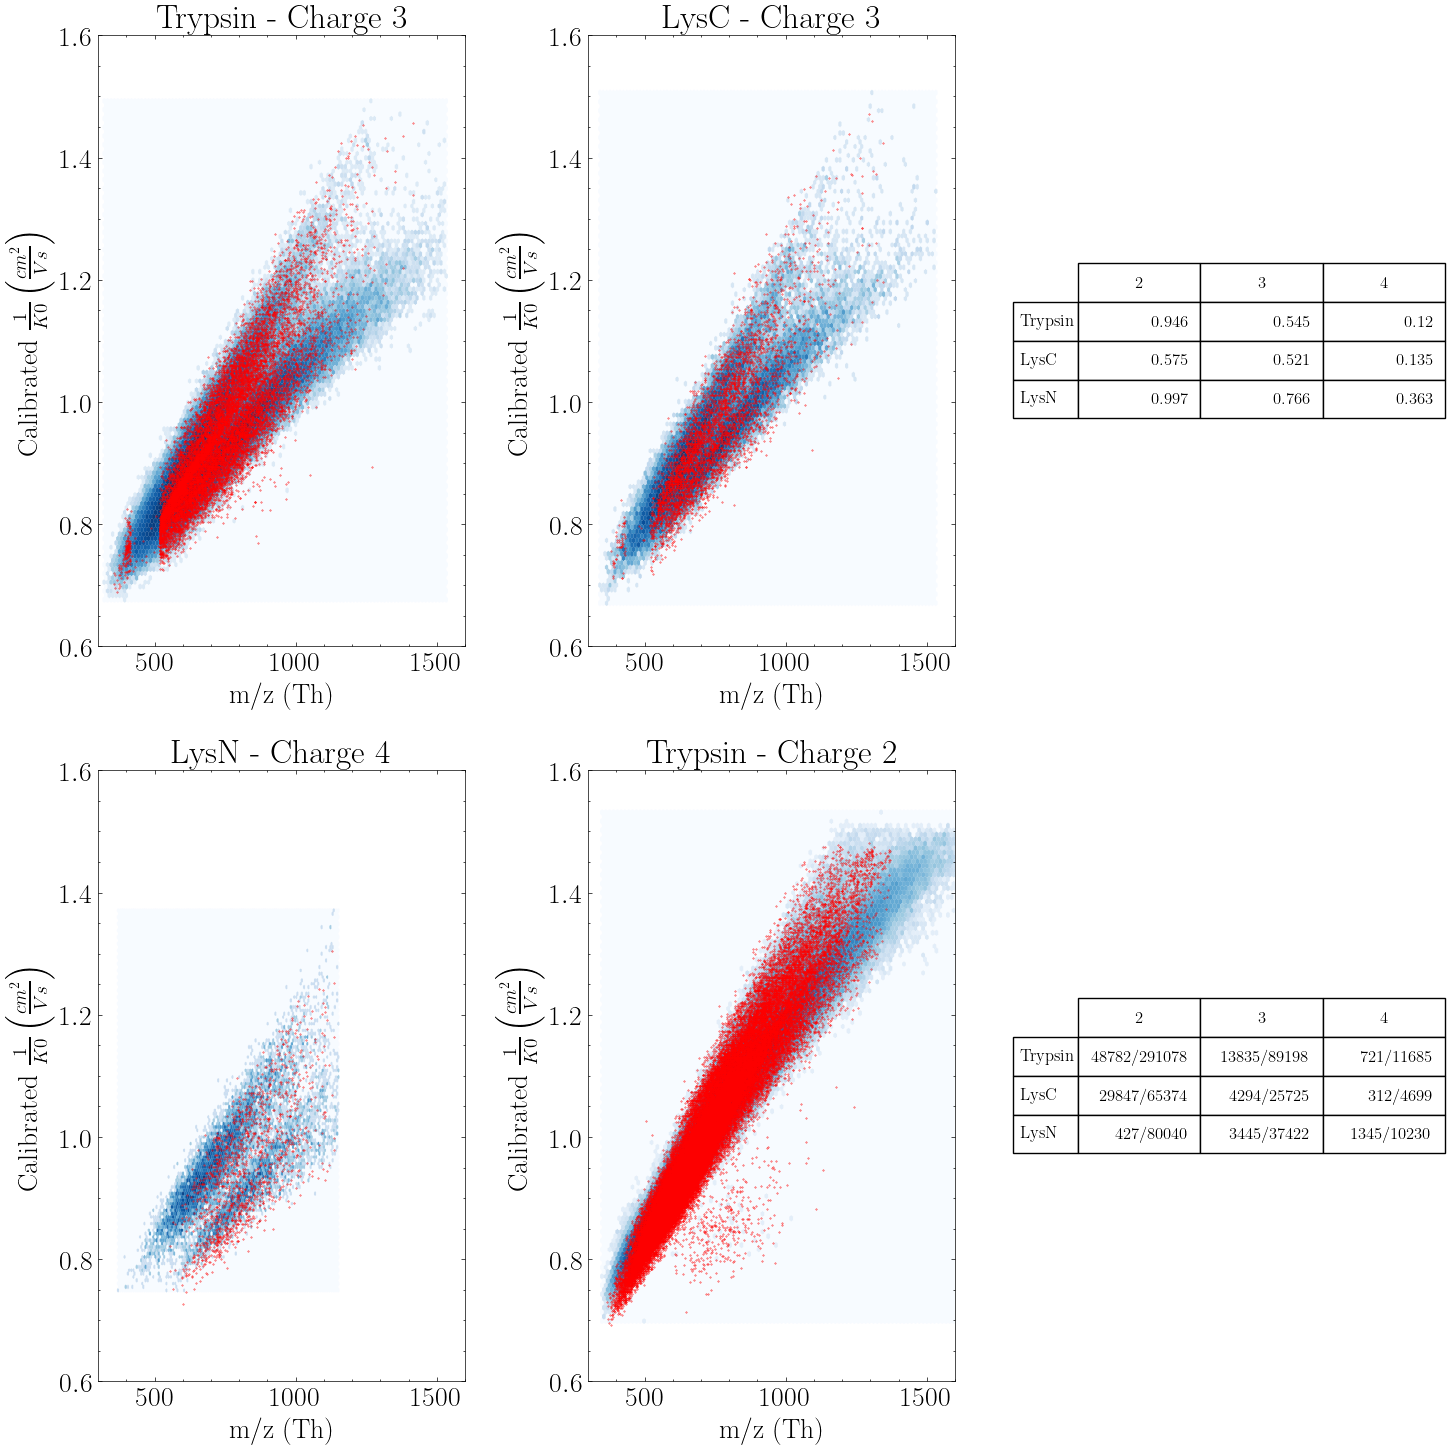

In [16]:
#plot Calibrated 1/K0 vs m/z for trypsin charge 3, lysc with charge 3, lysn with charge 4, trypsin with charge 2
fig, ax = plt.subplots(2, 3, figsize=(15, 15))
precursors = evidence.groupby(["Modified sequence", "Charge"]).first().reset_index()

for i, (enzyme, charge) in enumerate([("Trypsin", 3), ("LysC", 3), ("LysN", 4), ("Trypsin", 2)]):
    mask = precursors["Charge"] == charge
    mask &= precursors["Enzyme"] == enzyme
    precursors_charge = precursors[mask]
    #add the peptides in both clusters
    mask = peptides_both["Charge"] == charge
    mask &= peptides_both["Enzyme"] == enzyme
    peptides_in_both_charge = peptides_both[mask]
    
    ax[i//2, i%2].hexbin(precursors_charge["m/z"], precursors_charge["Aligned 1/K0"], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log",)
    ax[i//2, i%2].scatter(peptides_in_both_charge["m/z"], peptides_in_both_charge["Calibrated 1/K0"], c="red", s=0.1, alpha=1.0)
    ax[i//2, i%2].set_xlabel(r"m/z (Th)")
    ax[i//2, i%2].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$")
    ax[i//2, i%2].set_title(f"{enzyme} - Charge {charge}")
    ax[i//2, i%2].set_xlim([300, 1600])
    ax[i//2, i%2].set_ylim([0.6, 1.6])

#add the table with the peptides in both clusters
ax[1,2].axis("off")
table = ax[1,2].table(cellText=in_both.values, rowLabels=in_both.index, colLabels=in_both.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 2.0)

#add the table with the volumes as percentages
ax[0,2].axis("off")
table = ax[0,2].table(cellText=np.round(volumes.values, 3), rowLabels=volumes.index, colLabels=volumes.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 2.0)
plt.tight_layout()
    

In [25]:
volumes_nolysc

2         3         4
Trypsin  0.946158  0.545220  0.120321
LysN     0.997046  0.765916  0.363362

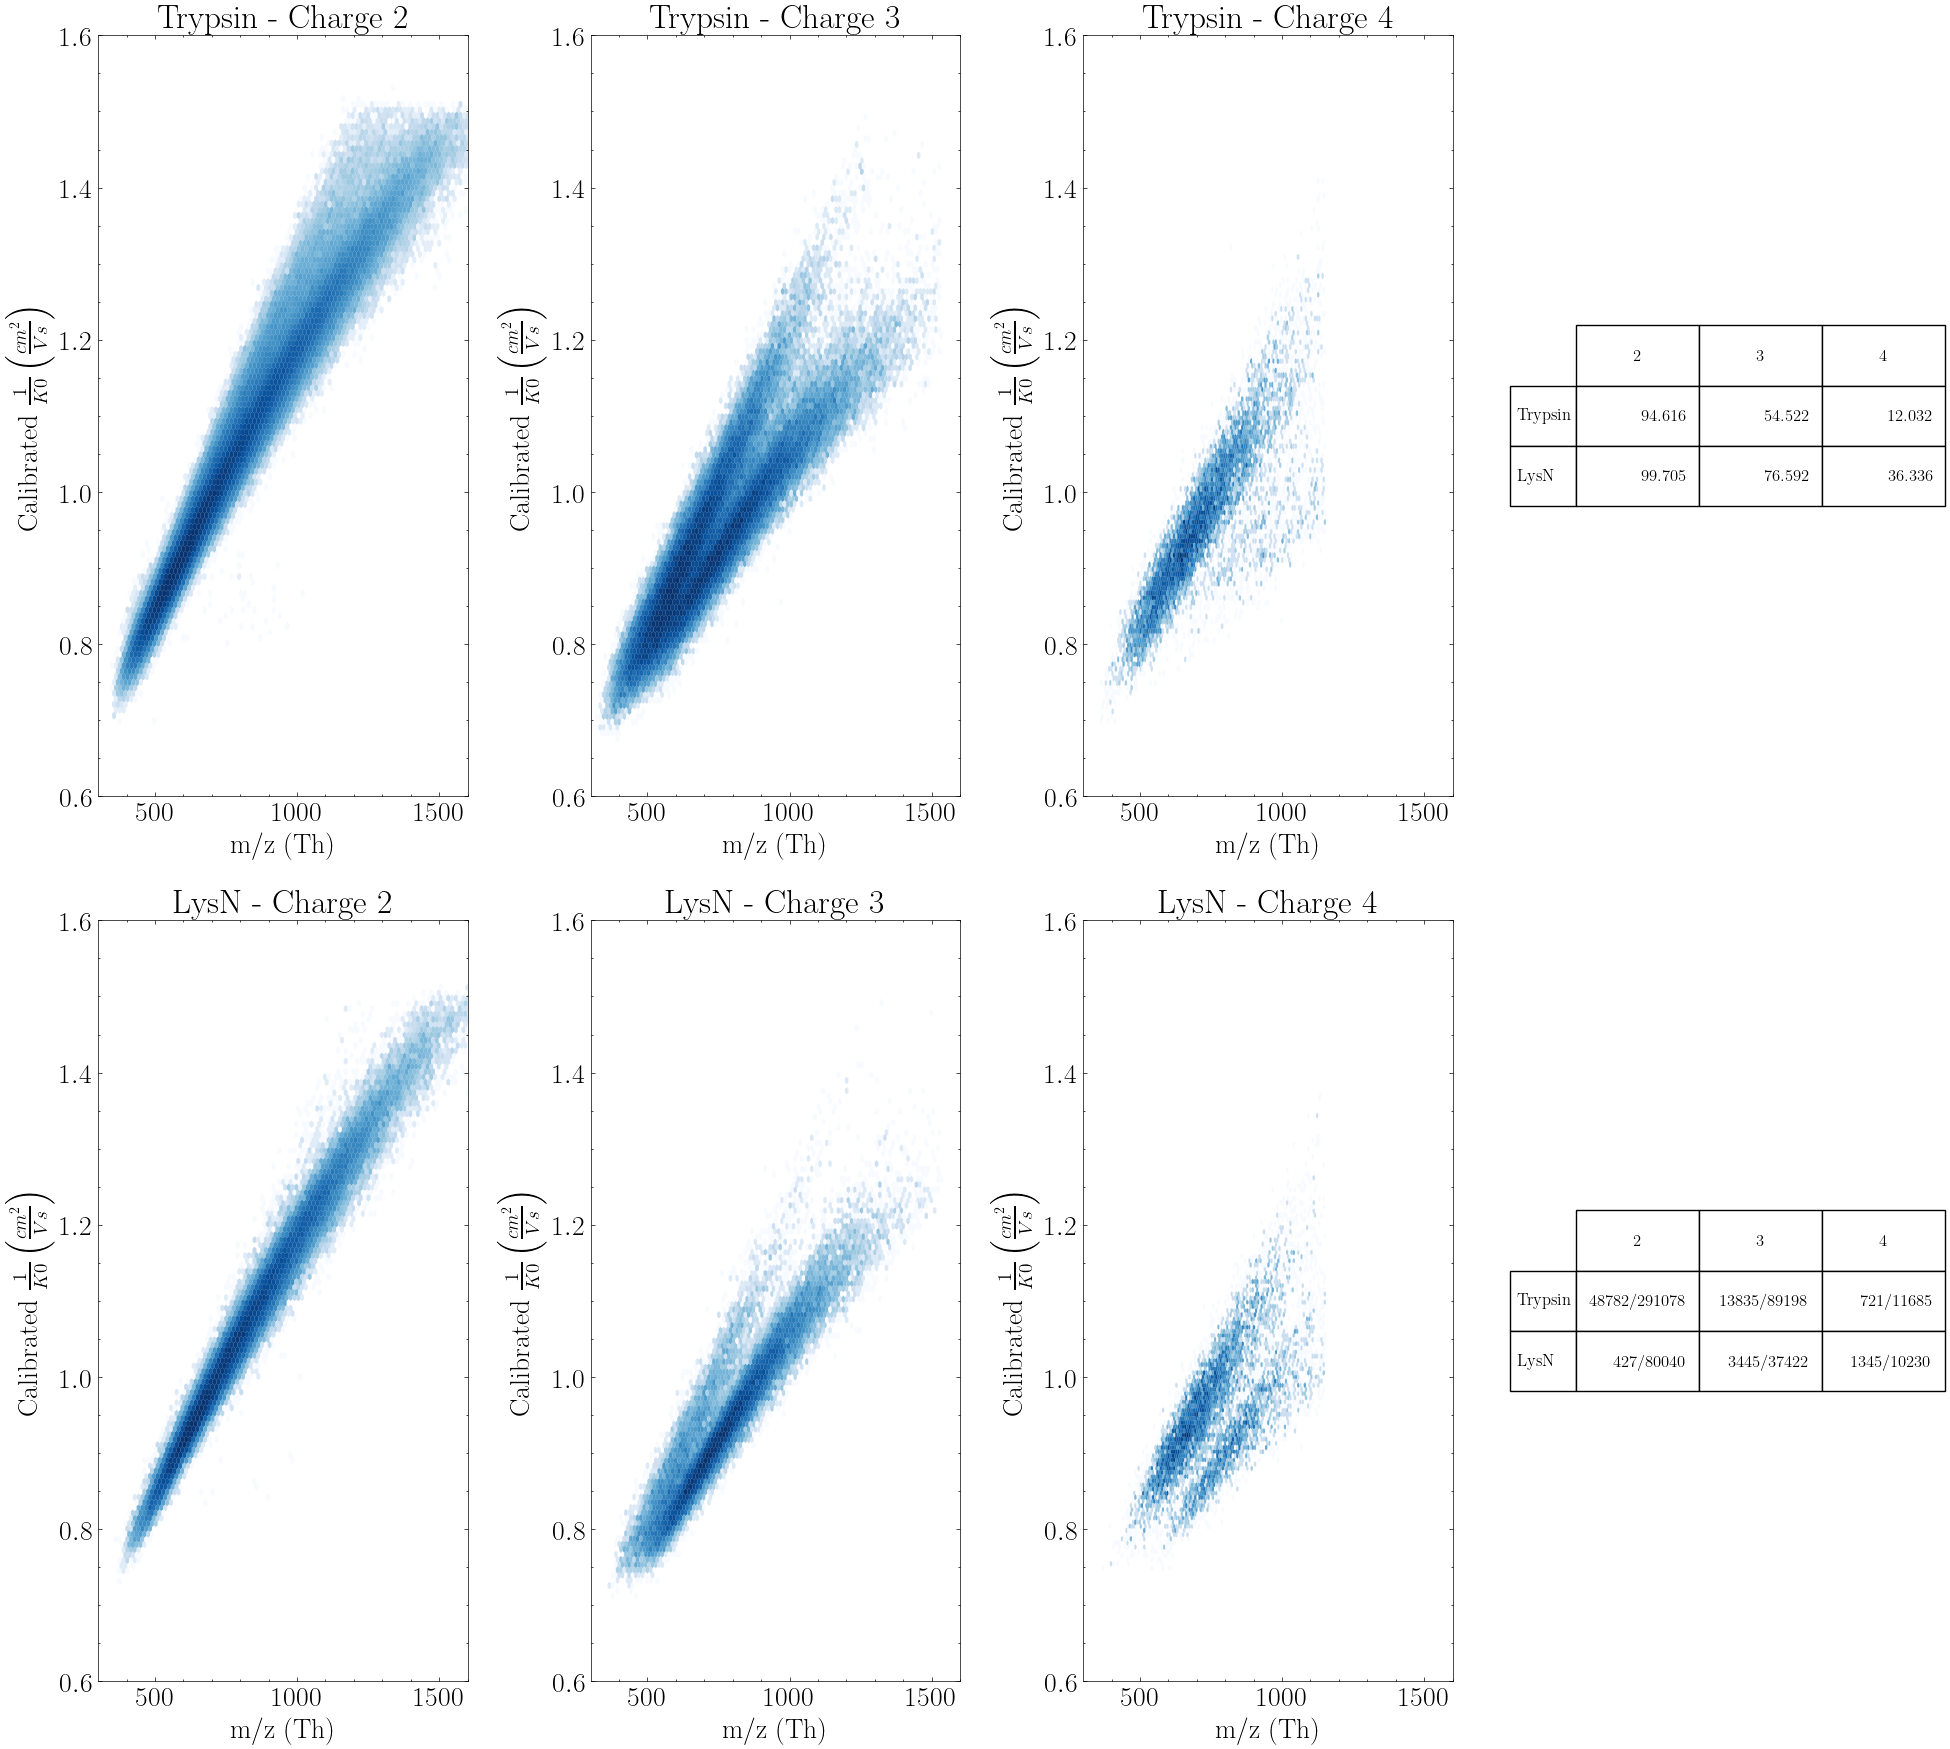

In [33]:
#plot Calibrated 1/K0 vs m/z for trypsin charge 3, lysc with charge 3, lysn with charge 4, trypsin with charge 2
fig, ax = plt.subplots(2, 4, figsize=(20, 18))
precursors = evidence.groupby(["Modified sequence", "Charge"]).first().reset_index()

for i, (enzyme, charge) in enumerate([("Trypsin", 2), ("Trypsin", 3), ("Trypsin", 4), ("LysN", 2), ("LysN", 3), ("LysN", 4)]):
    mask = precursors["Charge"] == charge
    mask &= precursors["Enzyme"] == enzyme
    precursors_charge = precursors[mask]
    #add the peptides in both clusters
    mask = peptides_both["Charge"] == charge
    mask &= peptides_both["Enzyme"] == enzyme
    peptides_in_both_charge = peptides_both[mask]
    
    ax[i//3, i%3].hexbin(precursors_charge["m/z"], precursors_charge["Aligned 1/K0"], gridsize = 100, cmap='Blues', linewidths=0.1, bins = "log", mincnt=1)
    ax[i//3, i%3].set_xlabel(r"m/z (Th)")
    ax[i//3, i%3].set_ylabel(r"Calibrated $\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$")
    ax[i//3, i%3].set_title(f"{enzyme} - Charge {charge}")
    ax[i//3, i%3].set_xlim([300, 1600])
    ax[i//3, i%3].set_ylim([0.6, 1.6])

#add the table with the volumes as percentages
ax[0,3].axis("off")
#filter out all vlaues from lysc from the table
volumes_nolysc = volumes.drop("LysC", axis=0)
table = ax[0,3].table(cellText=np.round(volumes_nolysc.values*100, 3), rowLabels=volumes_nolysc.index, colLabels=volumes_nolysc.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 3.0)

#add the table with the peptides in both clusters
ax[1,3].axis("off")
#filter out all vlaues from lysc from the table
in_both_nolysc = in_both.drop("LysC", axis=0)
table = ax[1,3].table(cellText=in_both_nolysc.values, rowLabels=in_both_nolysc.index, colLabels=in_both_nolysc.columns, loc="center")
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.0, 3.0)


plt.tight_layout()

## Supplementary Figure 4

In [18]:
diff = peptides_both.groupby(["Modified sequence","Charge"])["Aligned 1/K0"].diff().abs()
diff.argmax()

81211

Text(0, 0.5, 'Intensity (counts)')

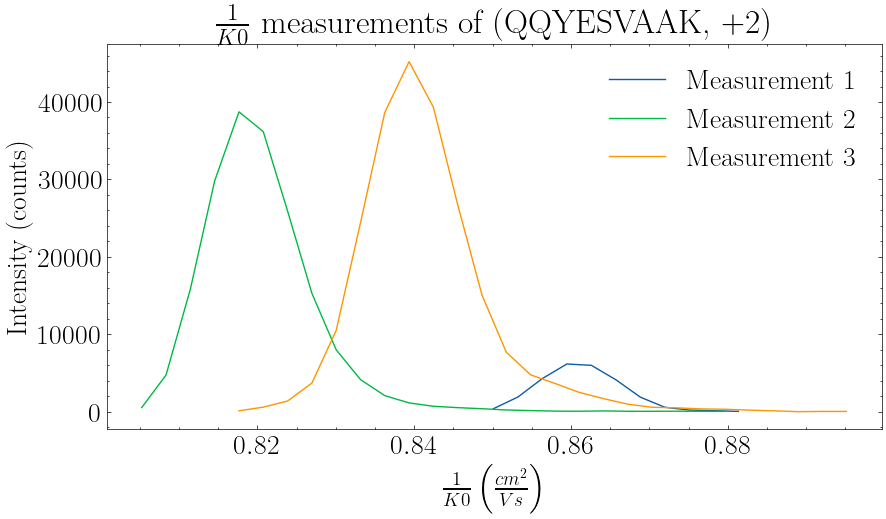

In [27]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
K0inv_1 = np.array(evidence['Calibrated 1/K0 values'][291399].split(";"), dtype=np.float64)
K0inv_2 = np.array(evidence['Calibrated 1/K0 values'][432251].split(";"), dtype=np.float64)
K0inv_3 = np.array(evidence['Calibrated 1/K0 values'][471913].split(";"), dtype=np.float64)
intensities_1 = np.array(evidence['Intensity values'][291399].split(";"), dtype=np.float64)
intensities_2 = np.array(evidence['Intensity values'][432251].split(";"), dtype=np.float64)
intensities_3 = np.array(evidence['Intensity values'][471913].split(";"), dtype=np.float64)


ax.plot(K0inv_1, intensities_1, label="Measurement 1")
ax.plot(K0inv_2, intensities_2, label="Measurement 2")
ax.plot(K0inv_3, intensities_3, label="Measurement 3")
ax.legend()
#ax.set_xlim(0.85, 1.03)
#ax.set_ylim(0.0, 9000)
ax.set_title(r"$\frac{1}{K0}$ measurements of (QQYESVAAK, +2)")
ax.set_xlabel(r"$\frac{1}{K0} \left( \frac{cm^2}{Vs} \right)$")
ax.set_ylabel(r"Intensity (counts)")

In [28]:
evidence[evidence["Sequence"]=="QQYESVAAK"][["Calibrated 1/K0","Charge"]]

Calibrated 1/K0  Charge
81211           0.881350       2
106862          0.878228       2
140685          0.868860       2
191333          0.875106       2
210484          0.878228       2
227924          0.871984       2
291399          0.871984       2
306917          0.868860       2
324491          0.867243       2
358057          0.882728       2
400807          0.867243       2
432251          0.867243       2
442876          0.876534       2
471913          0.873437       2
516085          0.867243       2
539669          0.864145       2
608868          0.878228       2
665476          0.871984       2
2170624         0.892840       2